In [1]:
#From the console, run the following
#pip install numpy
#pip install scipy
#pip install scikit-learn
#pip install matplotlib

# Import required packages here (after they are installed)
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mp
from pylab import show

# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv")

In [2]:
#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)


features = []
digits = []


for row in data:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]


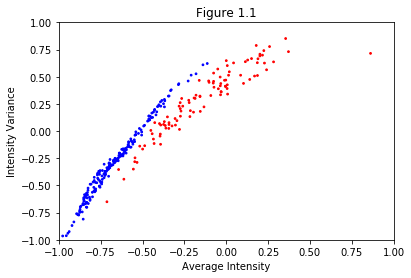

In [3]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
mp.scatter(X,Y,s=3,c=colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 1.1")

#display the current graph
show()


In [4]:
# create the model
# 

# Declare Model
model = KNeighborsClassifier(n_neighbors=1)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

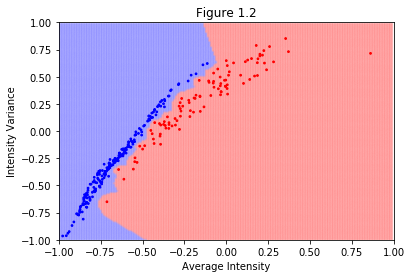

In [5]:
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 1.2")

show()

3a) I believe this model may suffer from overfitting because the prediction regions seem to be too fitted to the training data that it was provided. The red ("5.0") region very closely wraps around each red ("5.0") data point. This is expected since k is set to 1, so even if there was a red data point outlier in a region that one would very clearly expect to be blue, the data point would still have a red bubble around it, a clear sign of overfitting.

3b) I expect the accuracy to decrease as a result of the transformation to 2-dimensional space. This is because in 256-dimensional space we have significantly more features or distinct attributes to use for our model. When we transform to 2-dimensional space, in normalizing to 2 features (average intensity and intensity variance), we no longer have as much data for our predictions to be as accurate.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import manhattan_distances


print("10-Fold Cross Validation Errors:")
print("Euclidian distance - 2 dimensions: ", 1 - np.average(cross_val_score(model, simpleTrain, trainDigits, cv = 10)))
print("Euclidian distance - 256 dimensions: ", 1 - np.average(cross_val_score(model, trainFeatures, trainDigits, cv = 10)))


manhattan_2dim = (manhattan_distances(simpleTrain))
manhattan_256dim = (manhattan_distances(trainFeatures))


print("Manhattan distance - 2 dimensions: ", 1 - np.average(cross_val_score(model, manhattan_2dim, trainDigits, cv = 10)))
print("Manhattan distance - 256 dimensions: ", 1 - np.average(cross_val_score(model, manhattan_256dim, trainDigits, cv = 10)))


10-Fold Cross Validation Errors:
Euclidian distance - 2 dimensions:  0.006451612903225601
Euclidian distance - 256 dimensions:  0.003225806451612856
Manhattan distance - 2 dimensions:  0.06411290322580654
Manhattan distance - 256 dimensions:  0.0


3c) The cross validation error of the 2-dimensional model using euclidian distance seems to be approximately twice the error of that of the 256-dimensional model. I believe this may be a result of the loss of features/data that occurs with normalization to the 2-dimensional plane, causing the model to become less accurate.

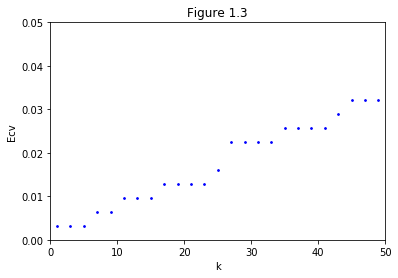

In [7]:
ecv_256dim = []

for i in range(1, 50, 2):
    newModel = KNeighborsClassifier(n_neighbors=i)
    ecv_256dim.append(1 - np.average(cross_val_score(newModel, trainFeatures, trainDigits, cv = 10)))

#Visualize Results
X_new = range(1, 50, 2)
Y_new = ecv_256dim

#plot the points
mp.scatter(X_new,Y_new,s=3,c="b")

#specify the axes
mp.xlim(0,50)
mp.xlabel("k")
mp.ylim(0,0.05)
mp.ylabel("Ecv")

#label the figure
mp.title("Figure 1.3")

#display the current graph
show()

4a) The value of k that I believe yields the best result is k = 3. k = 1, 3, and 5 yield nearly the same cross validation error, before the cross validation errors begin to rise as k increases. From these three values of k, k = 3 is preferable because I would predict that k = 1 would result in overfitting and k = 5 would result in underfitting.

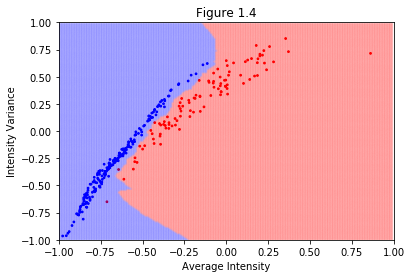

In [8]:
# create the model
# 

# Declare Model
model = KNeighborsClassifier(n_neighbors=3)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 1.4")

show()

4b) This model may slightly suffer from underfitting because there are one or two red data points that I would expect to fall in the correct decision region but they fall under the blue region. However, I feel that the extent to which this model stuffers from underfitting is quite minimal.

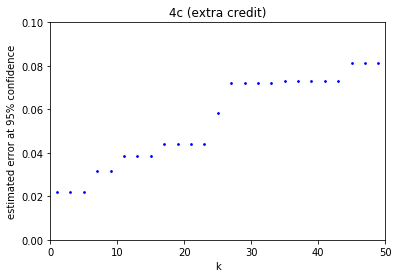

In [9]:
estimated_errors = []

for i in range(1, 50, 2):
    new_model = KNeighborsClassifier(n_neighbors=i)
    cross_val_scores = 1 - cross_val_score( new_model, trainFeatures, trainDigits, cv = 10)
    mean = ( np.average( cross_val_scores))
    std = ( np.std( cross_val_scores))
    estimated_errors.append( mean + 1.96 * std)


## Visualize Results
#plot the points
mp.scatter( range(1, 50, 2), estimated_errors, s=3, c="b")

#setup the axes
mp.xlim(0,50)
mp.xlabel("k")
mp.ylim(0,.1)
mp.ylabel("estimated error at 95% confidence")

#label the figure
mp.title("4c (extra credit)")

show()